# LISTA DE EXERCÍCIOS - SEMANA I

<hr>

## 1 - Dados ENEM

**Questão1a)** Com os dados do ENEM, verifique quais escolhas públicas têm alunos com boas médias no ENEM (há um segundo pico na Média de escolas públicas) e se elas têm algo em comum, por exemplo, se são escolas técnicas ou alguma outra característica em comum.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Inicialmente, importamos o conjunto de dados do ENEM, no formato csv (no  meu caso, separado por ponto e vírgula)

denem = pd.read_csv("ENEM.csv", sep=';', encoding= 'unicode_escape', na_values='-') 
# o primeiro parâmetro  é o endereço do arquivo csv no seu computador
# sep é usado para identificar o modo de separação no formato  do arquivo de dados
# na_values identifica a representação de dados faltantes

In [8]:
denem.head(6)     #visualisar as observações das seis primeiras linhas

,Ordem,UF,Município,Cidade,Admin,Escola,N_alunos,N_participantes,%_Participantes,NSE,NSE.1,Nivel_Docente,Média_30melhores,Média
0,1,SP,SAO PAULO,capital,Privada,OBJETIVO COLEGIO INTEGRADO,44,44,100.00,Muito Alto,Alto ou Muito Alto,67.0,680.06,658.29
1,2,SP,SAO PAULO,capital,Privada,VERTICE COLEGIO UNIDADE II,77,69,89.61,Muito Alto,Alto ou Muito Alto,68.1,677.07,649.81
2,3,SP,SAO CAETANO DO SUL,interior,Privada,VILLARE COLEGIO,16,16,100.00,Muito Alto,Alto ou Muito Alto,64.0,NaN,638.54
3,4,SP,SAO PAULO,capital,Privada,BANDEIRANTES COLEGIO EFM,526,440,83.65,Muito Alto,Alto ou Muito Alto,49.6,719.28,637.29
4,5,SP,SAO PAULO,capital,Privada,MOBILE COLEGIO,127,113,88.98,Muito Alto,Alto ou Muito Alto,55.3,679.21,636.83
5,6,SP,SANTOS,interior,Privada,OBJETIVO DO LITORAL CENTRO EDUCACIONAL UNIDADE II,22,22,100.00,Muito Alto,Alto ou Muito Alto,57.1,NaN,631.64


In [9]:
#salvando os nomes das escolas públicas e as respectivas médias no ENEM

publicas = denem.query('Admin == "Estadual"')[['Escola', 'Média']] 

In [10]:
publicas.sort_values('Média', ascending=False) #ordenar da maior para a menor média das escolas públicas
publicas.head(10)   # imprimir as escolas com as 10 melhores médias

,Escola,Média
29,SAO PAULO ETE DE,613.30
34,PARQUE DA JUVENTUDE ETE,610.76
48,IRMA AGOSTINA ETEC,604.41
54,CAMPINAS COLEGIO TECNICO DE - UNICAMP,603.82
61,TAKASHI MORITA ETEC,602.71
76,MARTIN LUTHER KING ETE,598.93
81,ALBERT EINSTEIN ETE,597.91
85,COL TEC INDUSTRIAL PROF ISAAC PORTAL ROLDAN UNESP,597.07
91,GETULIO VARGAS ETE,595.83
98,VASCO ANTONIO VENCHIARUTTI ETE,595.11


Podemos observar que as escolas públicas melhores classificadas, são as escolas técnicas. 

Text(0, 0.5, 'frequência')

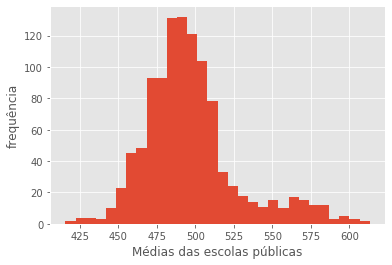

In [11]:
# histograma das médias das escolas públicas

plt.style.use('ggplot')     #escolhendo o estilo ggplot para plotar o histograma
plt.hist(publicas["Média"], bins = 30)    # gerando o histograma das médias; 
plt.xlabel("Médias das escolas públicas")  #nome do eixo x
plt.ylabel("frequência")   #nome do eixo y

<hr>

## 2 - Dados Cotas

Para a próxima questão utilizaremos os dados referente às cotas dos deputados. Assim, o primeiro passo é a importação do conjunto de dados.

In [20]:
dcotas = pd.read_csv("Cotas.csv", sep=';',encoding= 'unicode_escape', na_values='-') 

dcotas.head(5) #visualisar as observações das cinco primeiras linhas

,REEMBOLSO,NOME DO PARLAMENTAR,ANO,SUBQUOTA TRANSLATED,FORNECEDOR,VALOR
0,0,ABOU ANNI,2020,Serviços postais,CORREIOS - MALA DIRETA POSTAL BÁSICA-00.000.00...,88.16
1,0,ABOU ANNI,2020,Serviços postais,CORREIOS - MALA DIRETA POSTAL BÁSICA-00.000.00...,121.34
2,0,ABOU ANNI,2020,Serviços postais,CORREIOS - MALA DIRETA POSTAL BÁSICA-00.000.00...,1274.13
3,0,ALENCAR SANTANA BRAGA,2020,Serviços postais,CORREIOS - SEDEX CONVENCIONAL COM AR-00.000.00...,61.15
4,7002207,ALENCAR SANTANA BRAGA,2020,Combustíveis e lubrificantes,AUTO POSTO NOVO GAMA LTDA-20.168.440/0001-60,111.92


**Questão 2a)**
Construa um gráfico de Pareto descrevendo os valores gastos pelos deputados. Observe que, para cada deputado, a altura da barra deve representar o valor total gasto pelo deputado e não a frequência com que o deputado aparece na planilha de dados.

In [21]:
gastos = dcotas[['NOME DO PARLAMENTAR', 'VALOR']] #salvando em "gastos" apenas as variáveis 'NOME DO PARLAMENTAR' e 'VALOR'
gastos

,NOME DO PARLAMENTAR,VALOR
0,ABOU ANNI,88.16
1,ABOU ANNI,121.34
2,ABOU ANNI,1274.13
3,ALENCAR SANTANA BRAGA,61.15
4,ALENCAR SANTANA BRAGA,111.92
...,...,...
831,VITOR LIPPI,395.28
832,VITOR LIPPI,484.70
833,VITOR LIPPI,1115.86
834,VITOR LIPPI,2344.00


In [22]:
#grupando os dados por parlamentar e somando o valor gasto em todas as cotas, para cada um
somas = gastos.groupby("NOME DO PARLAMENTAR",as_index = False)[["NOME DO PARLAMENTAR","VALOR"]].sum() 

somas= somas.sort_values(by='VALOR',ascending=False)  #ordenando de forma decrescente os valores gastos 
somas

,NOME DO PARLAMENTAR,VALOR
45,PAULO TEIXEIRA,50469.66
56,SÂMIA BOMFIM,40801.00
26,HERCULANO PASSOS,31797.42
15,CEZINHA DE MADUREIRA,27853.11
55,SAMUEL MOREIRA,26844.15
...,...,...
27,IVAN VALENTE,508.58
49,RICARDO IZAR,343.74
35,MARCO BERTAIOLLI,320.59
57,TABATA AMARAL,171.79


In [23]:
somas["ACUMULADO"] = somas["VALOR"].cumsum()  #soma acumulada dos valores
total = somas["VALOR"].sum()  #total gasto (geral)
total = total.round(2)  #arredondamento em duas casas decimais
somas["ACUMULADO_%"] = (somas["ACUMULADO"]/(total))*100  #soma acumulada em percentual 
somas["ACUMULADO_%"] = somas["ACUMULADO_%"].round(2)  #arredondamento o percentual acumulado em duas casas decimais
somas

,NOME DO PARLAMENTAR,VALOR,ACUMULADO,ACUMULADO_%
45,PAULO TEIXEIRA,50469.66,50469.66,8.33
56,SÂMIA BOMFIM,40801.00,91270.66,15.07
26,HERCULANO PASSOS,31797.42,123068.08,20.32
15,CEZINHA DE MADUREIRA,27853.11,150921.19,24.92
55,SAMUEL MOREIRA,26844.15,177765.34,29.35
...,...,...,...,...
27,IVAN VALENTE,508.58,604860.93,99.86
49,RICARDO IZAR,343.74,605204.67,99.91
35,MARCO BERTAIOLLI,320.59,605525.26,99.97
57,TABATA AMARAL,171.79,605697.05,100.00


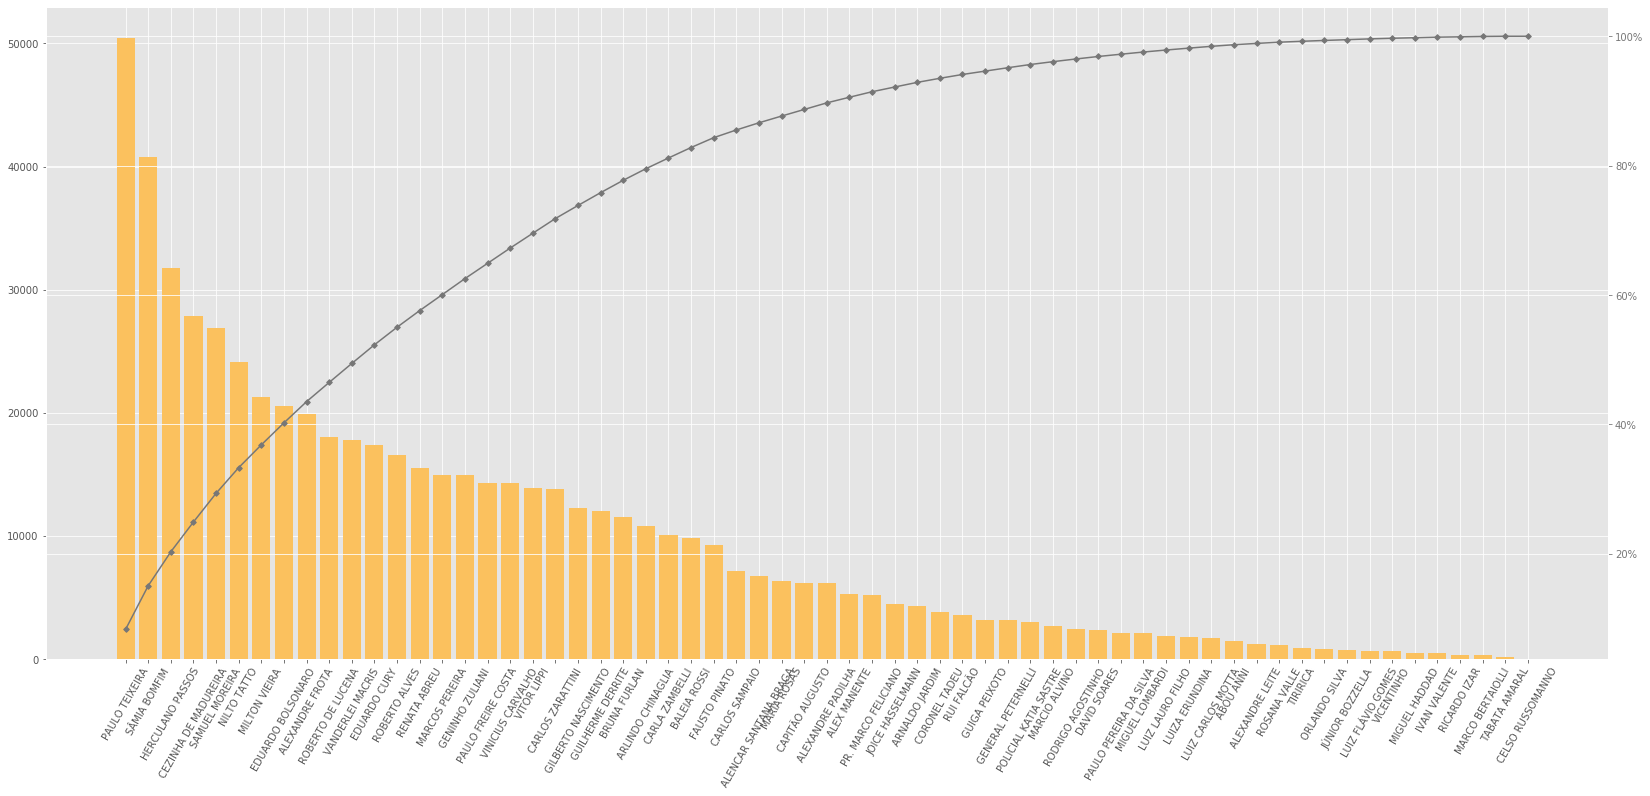

In [24]:
#Gráfico de Pareto 

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots() 
ax.bar(somas['NOME DO PARLAMENTAR'],somas['VALOR'], color="C4")  #gráfico de barras
ax2 = ax.twinx()
ax2.plot(somas['NOME DO PARLAMENTAR'], somas["ACUMULADO_%"], color="C3", marker="D", ms=4) # plotando a curva
ax2.yaxis.set_major_formatter(PercentFormatter())  #colocando os valores do eixo do segundo gráfico em porcentagem

ax.tick_params(axis="x", labelrotation = 60)   # definindo a leganda para cada barra do eixo x; labelrotation é a inclinação 
ax2.tick_params(axis="y", colors="C3")   #inserindo os valores no eixo  do segundo gráfico; 

plt.gcf().set_size_inches(28, 12) # alterar tamanho do gráfico


<hr>

**Questão 2b)** Construa uma tabela de frequências e o gráfico de barras do valor gasto por subcota.

In [25]:
# tabela de frequência das subcotas

c = dcotas["SUBQUOTA TRANSLATED"].value_counts()  #frequência para cada subcota
p = dcotas["SUBQUOTA TRANSLATED"].value_counts(normalize=True).round(4) * 100  #frequência percentual
pd.concat([c,p], axis=1, keys=['counts', '%'])  #concatenando as duas frequências


,counts,%
Combustíveis e lubrificantes,234,27.99
Serviços postais,177,21.17
"Serviço de táxi, pedágio e estacionamento",116,13.88
Manutenção de escritório de apoio à atividade parlamentar,102,12.20
Fornecimento de alimentação do parlamentar,42,5.02
Divulgação da atividade parlamentar,39,4.67
Telefonia,35,4.19
"Hospedagem ,exceto do parlamentar no distrito federal",33,3.95
Emissão bilhete aéreo,21,2.51
Locação ou fretamento de veículos automotores,18,2.15


Agora a construção do gráfico de barras das subcotas.

In [26]:
# agrupando os dados originais por subcota, somando o valor gasto em cada uma 
subcotas = dcotas.groupby('SUBQUOTA TRANSLATED', as_index = False)[['SUBQUOTA TRANSLATED', 'VALOR']].sum()
subcotas.sort_values("VALOR",ascending = False, inplace = True) #ordenando de forma decrescente 
subcotas

,SUBQUOTA TRANSLATED,VALOR
3,Divulgação da atividade parlamentar,247381.41
8,Manutenção de escritório de apoio à atividade ...,99672.45
7,Locação ou fretamento de veículos automotores,66639.03
1,Combustíveis e lubrificantes,58480.60
2,"Consultorias, pesquisas e trabalhos técnicos",43000.00
4,Emissão bilhete aéreo,22639.77
13,Telefonia,17636.45
12,Serviços postais,17533.59
10,Serviço de segurança prestado por empresa espe...,9489.00
6,"Hospedagem ,exceto do parlamentar no distrito ...",9192.11


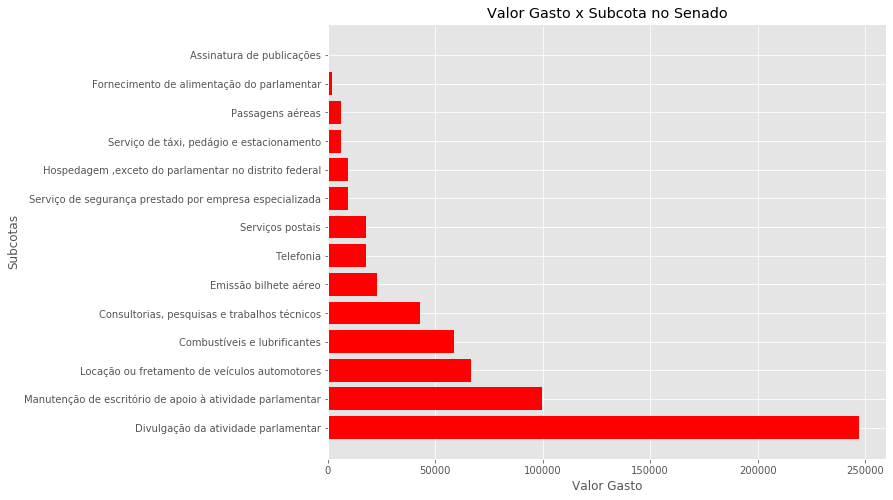

In [27]:
#PLOTANDO O GRÁFICO DE BARRAS

plt.figure(figsize = (10, 8)) #tamanho da figura
plt.barh(subcotas['SUBQUOTA TRANSLATED'], subcotas['VALOR'].values, color="red") #gráfico de barras


plt.yticks(subcotas['SUBQUOTA TRANSLATED'])  #legendas de cada barra no eixo x
plt.xlabel('Valor Gasto') #nome para o eixo y
plt.ylabel('Subcotas')  #nome para o eixo x
plt.title('Valor Gasto x Subcota no Senado')  #título do gráfico
 
plt.show()  #método show() para mostrar o gráfico na tela

In [ ]:
Como gastam com divulgação da atividade parlamentar!

**Questão 2c)** Construa um gráfico de colunas empilhadas: uma coluna de 0 a 100% representando o total de gasto para cada subquota. Em cada coluna, diferenciar por cores o percentual gasto pelos deputados.

In [28]:
parlamentar = dcotas.groupby(['NOME DO PARLAMENTAR', 'SUBQUOTA TRANSLATED'])[['VALOR']].sum() #agrupando os dados por parlamentar
#e subcotas; somando o valor gasto por parlamentar em cada sucota
parlamentar.sort_values("VALOR", ascending = True, inplace = True)  #ordenando de forma crescente os valores gastos nas sucotas
parlamentar  

,,VALOR
NOME DO PARLAMENTAR,SUBQUOTA TRANSLATED,
CAPITÃO AUGUSTO,"Serviço de táxi, pedágio e estacionamento",7.40
CORONEL TADEU,"Serviço de táxi, pedágio e estacionamento",15.00
TABATA AMARAL,Serviços postais,15.55
ARLINDO CHINAGLIA,Serviços postais,16.30
ARNALDO JARDIM,"Serviço de táxi, pedágio e estacionamento",25.00
...,...,...
SAMUEL MOREIRA,Divulgação da atividade parlamentar,13105.58
CEZINHA DE MADUREIRA,Divulgação da atividade parlamentar,21950.00
HERCULANO PASSOS,Divulgação da atividade parlamentar,25541.50


In [29]:
#salvando as informações de "parlamentar" como tabelas
tabela = pd.pivot_table(data=parlamentar, values='VALOR', index='NOME DO PARLAMENTAR', columns='SUBQUOTA TRANSLATED', 
                        aggfunc='sum')  

Text(0, 0.5, 'Valor Gasto')

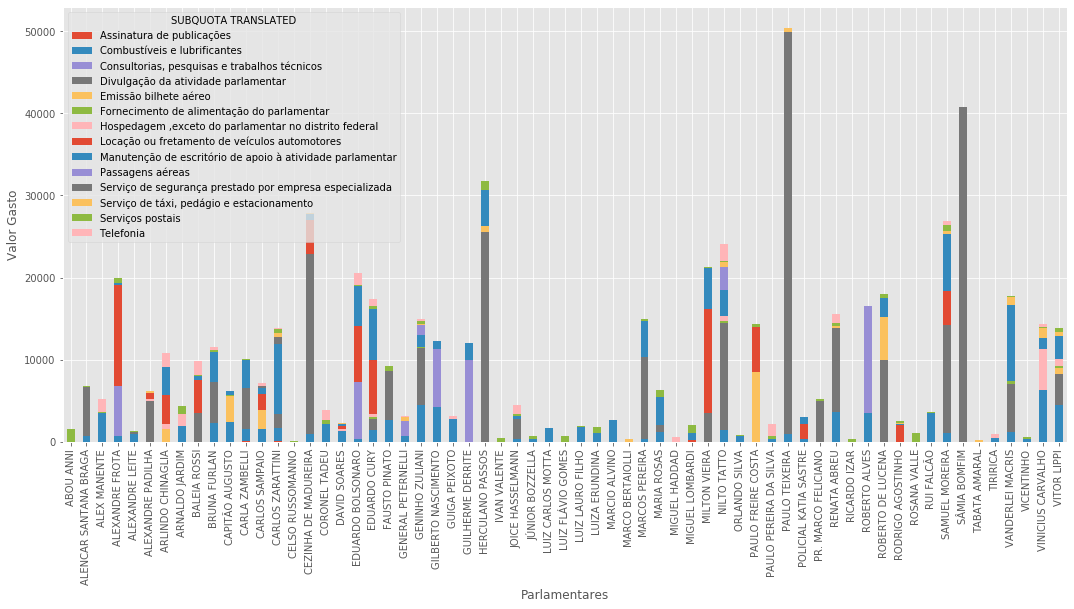

In [30]:
 #Construir o gráfico de barras empilhadas

grafico = tabela.plot(kind="bar", stacked=True, figsize=(18, 8), fontsize = 10)


plt.xlabel('Parlamentares') #nome para o eixo x
plt.ylabel('Valor Gasto')  #nome para o eixo y



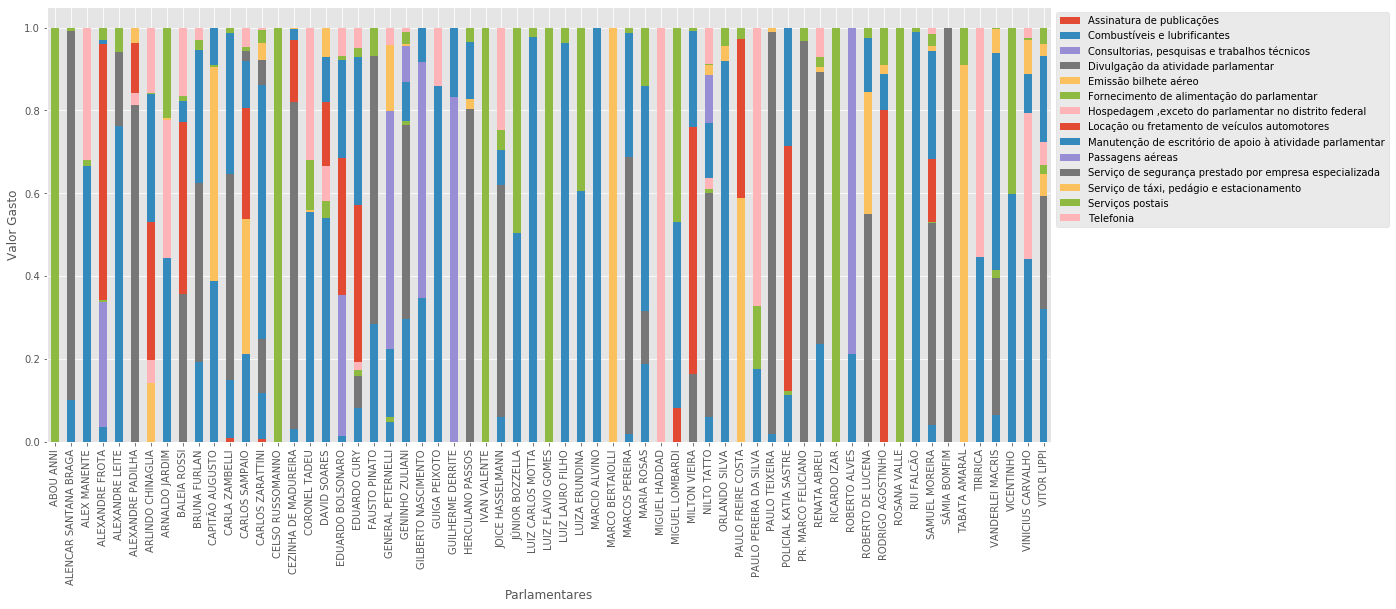

In [54]:
# porcentagem
tabela = tabela.fillna(0)
tabela = pd.DataFrame.divide(tabela, tabela.sum(axis = 1), axis = 0) # normaliza as linhas da tabela
grafico = tabela.plot(kind="bar", stacked=True, figsize=(18, 8), fontsize = 10)
plt.xlabel('Parlamentares') #nome para o eixo x
plt.ylabel('Valor Gasto')  #nome para o eixo y
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

<Figure size 1152x576 with 0 Axes>

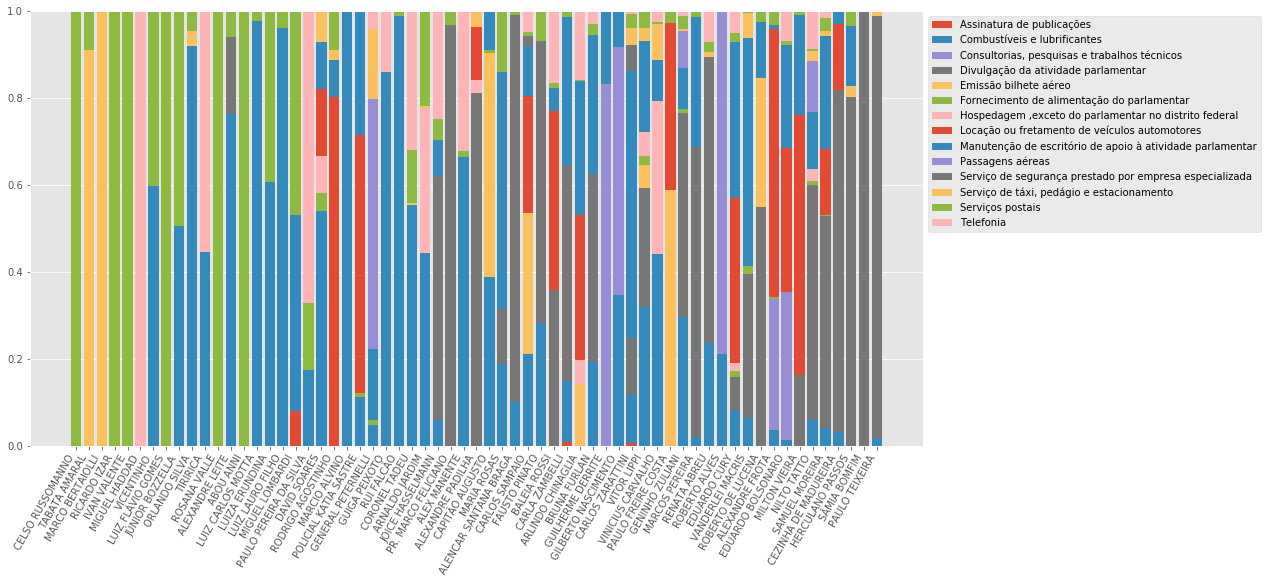

In [58]:
# solução do Tobias
# (gráfico de barras empilhadas feito manualmente)

import numpy as np

plt.figure(figsize = (16, 8))

data = dcotas.groupby(['NOME DO PARLAMENTAR', 'SUBQUOTA TRANSLATED'])['VALOR'].sum()      
quotas = data.unstack(level = 1).fillna(0) # pivot tbm funciona
quotas['total'] = quotas.sum(axis = 1)
quotas.sort_values('total', inplace = True) # só para deixar o gráfico mais ordenado
quotas = pd.DataFrame.divide(quotas, quotas['total'], axis = 0)


plt.figure(figsize = (16, 8))
bottom = np.zeros(len(quotas))
for quota in quotas.columns[:-1]: # ignora coluna total
    height = quotas[quota]
    plt.bar(range(len(quotas)), height = height, bottom = bottom, label = quota)
    bottom = height + bottom

plt.xticks(range(len(quotas)), quotas.index,
           rotation = 60, horizontalalignment = 'right')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

OBS: Se olhar atentamente para esses gráficos, você vai notar que algumas cores se repetem na legenda. Isso ocorre porque o Matplotlib separa conjuntos de dados em até 10 cores, em uma sequência pre determinada, quando as cores acabam, ele recomeça a sequência de cores. Como temos 14 subquotas, 4 estão com cores repetidas.


Sugiro que olhem o link abaixo:
https://stackoverflow.com/questions/8389636/creating-over-20-unique-legend-colors-using-matplotlib/8391452#8391452
Nesse link explicam como mudar a sequência de cores. Mas notem que essa sequência possui cores muito parecidas.

Quando queremos distiguir conjuntos de dados, queremos cores bem diferentes. O problema é que quanto mais conjuntos temos, fica mais difícil achar cores que sejam bem diferentes. Portanto pode ser interessante agregar alguns conjuntos para permitir uma análise visual.

**Questão 2d)** Construa os boxplots do valor gasto por subquota e calcule as medidas descritivas (média, mediana, mínimo, máximo e desvio padrão, por exemplo, também por subquotas).

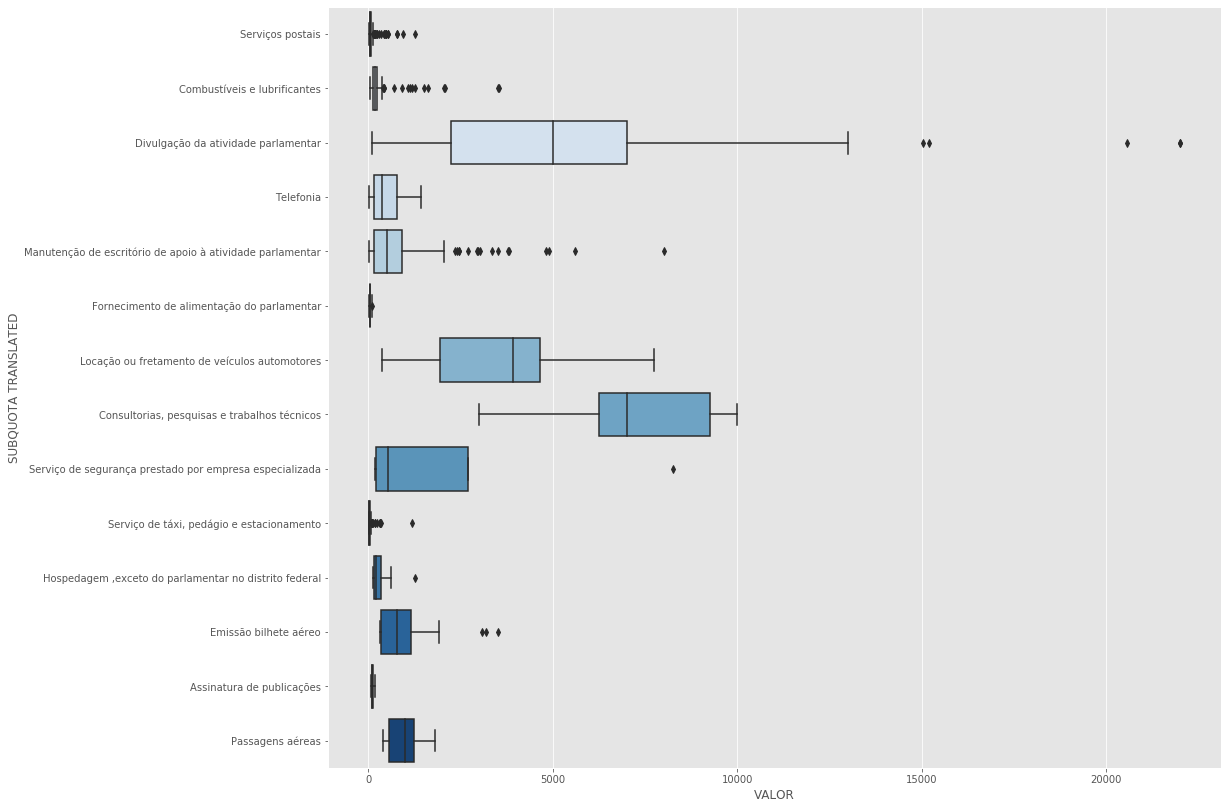

In [213]:
import seaborn as sns

plt.figure(figsize = (16,14))  #dimensões da figura
sns.boxplot(y=dcotas['SUBQUOTA TRANSLATED'],x=dcotas['VALOR'], palette="")  # boxplot dos valores para cada subcota

In [ ]:
Agora geramos medidas descritivas para cada uma das cotas utilizadas:

In [150]:
dcotas.groupby('SUBQUOTA TRANSLATED')['VALOR'].describe()   # medidas descritivas dos valores gastos por subcota

,count,mean,std,min,25%,50%,75%,max
SUBQUOTA TRANSLATED,,,,,,,,
Assinatura de publicações,3.0,115.933333,46.186614,79.90,89.9000,99.900,133.9500,168.00
Combustíveis e lubrificantes,234.0,249.917094,403.287867,30.00,122.0025,168.240,230.3350,3535.69
"Consultorias, pesquisas e trabalhos técnicos",6.0,7166.666667,2639.444386,3000.00,6250.0000,7000.000,9250.0000,10000.00
Divulgação da atividade parlamentar,39.0,6343.113077,5796.989878,105.58,2250.0000,5000.000,7000.0000,22000.00
Emissão bilhete aéreo,21.0,1078.084286,1031.917828,320.59,352.8500,764.890,1155.5700,3519.85
Fornecimento de alimentação do parlamentar,42.0,41.663571,23.486447,10.40,28.8625,36.645,54.2200,105.00
"Hospedagem ,exceto do parlamentar no distrito federal",33.0,278.548788,209.059853,129.00,158.1000,203.840,335.0000,1275.00
Locação ou fretamento de veículos automotores,18.0,3702.168333,2138.667998,360.00,1938.5050,3925.000,4661.2500,7744.10
Manutenção de escritório de apoio à atividade parlamentar,102.0,977.180882,1374.296282,19.90,147.0025,500.565,909.6900,8000.00
